# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
hcahps = pd.read_csv('HCAHPS-Hospital.csv', na_values='Not Available')

# Exclude measures other than HCAHPS linear mean scores,
# which reflect CMS adjustments for the effects of patient mix and survey mode
hcahps_scores = hcahps[hcahps['HCAHPS Answer Description'].str[-17:]=='linear mean score']

# Long to wide transformation
index_list= ['Facility ID', 'Facility Name', 'Address', 'City','State','ZIP Code', 'Number of Completed Surveys', 'Survey Response Rate Percent', 'Start Date', 'End Date']
hcahps_scores_wide = hcahps_scores.pivot(index=index_list, columns='HCAHPS Question', values='HCAHPS Linear Mean Value')
hcahps_scores_all = hcahps_scores_wide.reset_index()

# Tranfer columns with scores to numeric
column_list = hcahps_scores_all.columns
for col in column_list:
    if col[-5:] == 'score':
        hcahps_scores_all[col] = pd.to_numeric(hcahps_scores_all[col])

# show # of rows and columns
print('{} rows, {} columns'.format(hcahps_scores_all.shape[0], hcahps_scores_all.shape[1]))

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (12,14,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4882 rows, 20 columns


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:
# count unique values in each column
unique_values = {}
for col in column_list:
    count = len(hcahps_scores_all[col].unique())
    unique_values[col] = count
    
print('The column with most disversity: {}'.format(max(unique_values, key=lambda key: unique_values[key])))
unique_values

The column with most disversity: Facility ID


{'Facility ID': 4882,
 'Facility Name': 4727,
 'Address': 4855,
 'City': 2958,
 'State': 56,
 'ZIP Code': 4455,
 'Number of Completed Surveys': 1547,
 'Survey Response Rate Percent': 70,
 'Start Date': 1,
 'End Date': 1,
 'Care transition - linear mean score': 27,
 'Cleanliness - linear mean score': 29,
 'Communication about medicines - linear mean score': 37,
 'Discharge information - linear mean score': 34,
 'Doctor communication - linear mean score': 23,
 'Nurse communication - linear mean score': 23,
 'Overall hospital rating - linear mean score': 27,
 'Quietness - linear mean score': 37,
 'Recommend hospital - linear mean score': 35,
 'Staff responsiveness - linear mean score': 33}

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
# Identify the column with one unique value
for col in column_list:
    if unique_values[col] == 1:
        print("The column '{}' has same value for all rows".format(col))

The column 'Start Date' has same value for all rows
The column 'End Date' has same value for all rows


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

count    3458.000000
mean       88.537883
std         3.344614
min        67.000000
25%        87.000000
50%        89.000000
75%        91.000000
max        98.000000
Name: Overall hospital rating - linear mean score, dtype: float64

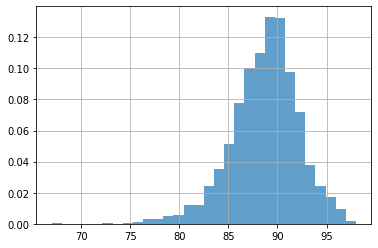

In [4]:
import matplotlib.pyplot as plt
hcahps_scores_all['Overall hospital rating - linear mean score'].hist(bins=30, density=True, alpha=0.7)
hcahps_scores_all['Overall hospital rating - linear mean score'].describe()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
CA,299.0,87.792642,3.548865,76.0,86.0,88.0,90.0,98.0
NY,147.0,85.700680,3.700083,77.0,83.5,86.0,88.0,95.0
TX,254.0,89.192913,3.206680,78.0,87.0,89.0,91.0,96.0
WI,101.0,90.584158,2.307671,86.0,89.0,91.0,92.0,97.0


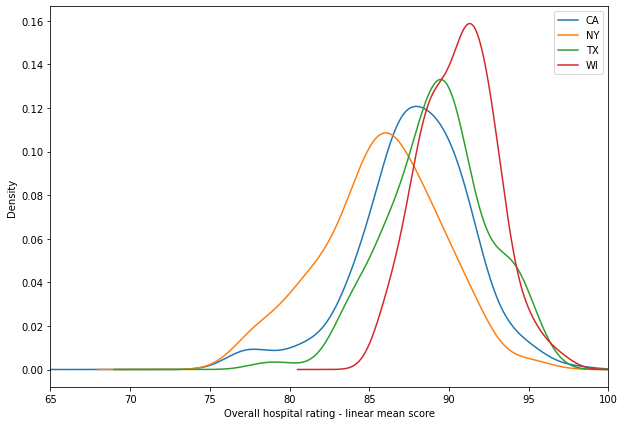

In [5]:
hcahps_scores_4states = hcahps_scores_all.loc[hcahps_scores_all['State'].isin(['CA', 'NY', 'TX', 'WI'])]
hcahps_scores_4states.groupby(['State'])['Overall hospital rating - linear mean score'].plot.kde(
    xlim=(65,100),
    legend=True,
    figsize=(10,7)
)
plt.xlabel("Overall hospital rating - linear mean score")
plt.savefig('hcahps_scores_4states.png')
hcahps_scores_4states.groupby(['State'])['Overall hospital rating - linear mean score'].describe()

#### Observation:
Hospital overall satisfaction score varied significantly between the four states. Hospitals in WI were rated highest, followed by TX, CA, and NY. Among the four states, higher average ratings were associated with less variation.

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [6]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [ ]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.